In [4]:
import cv2 
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('Joker.jpg')

# this function is for displaying our image
cv2.imshow('image', img)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

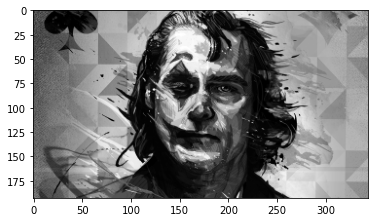

In [10]:
def resize_images(img_arr, scale):
    """Resizes a single image""" 
    scale_percent = scale
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(resized)
    cv2.imshow("Resized image", resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

resize_images(img, 10)


## Question For Select Coordinate

###### Here, we make a function  to define the coordinate from the mouse event buttom


In [11]:
'''
Here I make a function to do Set Mouse Callback. This function allow us to use the mouse to call
this function whenever we use the mouse. There are so many mouse ability that we can use in this 
function. Firstly we will check how many mouse ability in the Set Mouse Callback function

For the point number 1, we will use two mouse ability which are 'EVENT_FLAG_LBUTTON' and 'EVENT_FLAG_RBUTTON'
'EVENT_FLAG_LBUTTON' is the Set Mouse Callback function to call the function whenever we click the left mouse 
button, while 'EVENT_FLAG_RBUTTON' is for clicking the right mouse
'''

events = [i for i in dir(cv2) if 'EVENT' in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

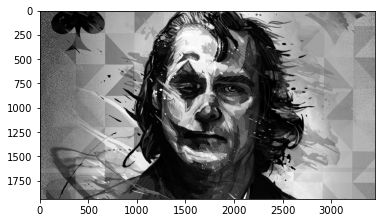

In [15]:
import cv2 
import numpy as np
'''
Firstly we define the name our function 'click_coordinate'. Basically four parameter here,
1. event --> It is to define with mouse ability that we use 
2. x,y --> It is to define the cordinate of the pixel
3. flags --> It is specific condition whenever a mouse event occurs.
4. Param --> it is parameter passed from setMouseCallback(). This parameter is optional 
at setMouseCallback(), so it can not be set. param is the image parameter we pass to it
'''

bgr =[]
n_bgr = 0
res = [] 
n = 0    

def click_coordinate(event, x, y, flags, params):
 
    # Here, I am using left click of the mouse 
    if event == cv2.EVENT_LBUTTONDOWN:
        #Here, I make the notebook to write coodinate of pixel 
        with open('click_coordinate.txt','a+') as f:
            
            # After that, I print the pixel coordinate of the image as we explained before
            print(x, ' ', y)
            # In this case, I want to make the pixel coordinate appear in the image 
            cv2.putText(img,'X:'+str(x) + ', Y:' + str(y), (x,y), 
                        cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 1)
            cv2.imshow('image', img)
            
            if len(res) == 0:
                first_sentence = f'\nThe coordinate pixel for determine pixel coordinate:\nThe coordinate of x:{x}, y:{y} \n'
                f.write(first_sentence)
                res.insert(n, '')   

            else:
                coordinates = f'The coordinate of x:{x}, y:{y} \n'
                f.write(coordinates)
 
    # in this condition, we are using right click of the mouse    
    if event==cv2.EVENT_RBUTTONDOWN:
        '''
        Basically, standart image order of the open cv for the colour is blue,green,red
        Therefore, we will define the colour of coordinate with this order, not RGB
        
        Also, when you try to see image shape, the order is height and width, and colour
        So, basically x axis = width and y axis = height, for example if you want to take
        the coordinate x = 10 and y = 40, yo should reverse x and y position. because in 
        the image.shape height or 'y axis' is coming first.        
        '''
         #Here, I make the notebook to write bgr in the certain coordinate of pixel
        with open('bgr_coordinate.txt','a+') as f:
        
            b = img[y, x, 0]
            g = img[y, x, 1]
            r = img[y, x, 2]
            cv2.putText(img, 'B:'+ str(b) + ', G:' + str(g) + ', R:' + str(r),(x,y), 
                        cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 0), 1)
            print(b, ' ', g,' ',r)
            cv2.imshow('image', img)
            
            if len(bgr) == 0:
                first_sentence = f'\nThe bgr for the selected pixel coordinate: \nthe coodinate of x:{x}, y:{y}, with the B:{b}, G{b}, R{r} \n'
                f.write(first_sentence)
                bgr.insert(n_bgr, '')   

            else:
                a = f'the coodinate of x:{x}, y:{y}, with the B:{b}, G{b}, R{r} \n'
                f.write(a)
   
# It is only doing driver function 
if __name__=="__main__":
    # here, we read the picture that we want to find the coordinate
    img = cv2.imread('Joker.jpg')

    # this function is for displaying our image
    cv2.imshow('image', img)
    plt.imshow(img)

    '''
    here, we are using Set Mouse Callback function, and it will call our
    function above, which are left and right click mouse
    '''
    cv2.setMouseCallback('image', click_coordinate)

    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()

## Question for stretching image

###### Here, we make a function to stretch the image from 0 to 255

If you take a look the image below, gray scale image, normally has the RGB in range near to (0,0,0) and (255,255,255).
After that we do stretching the image 

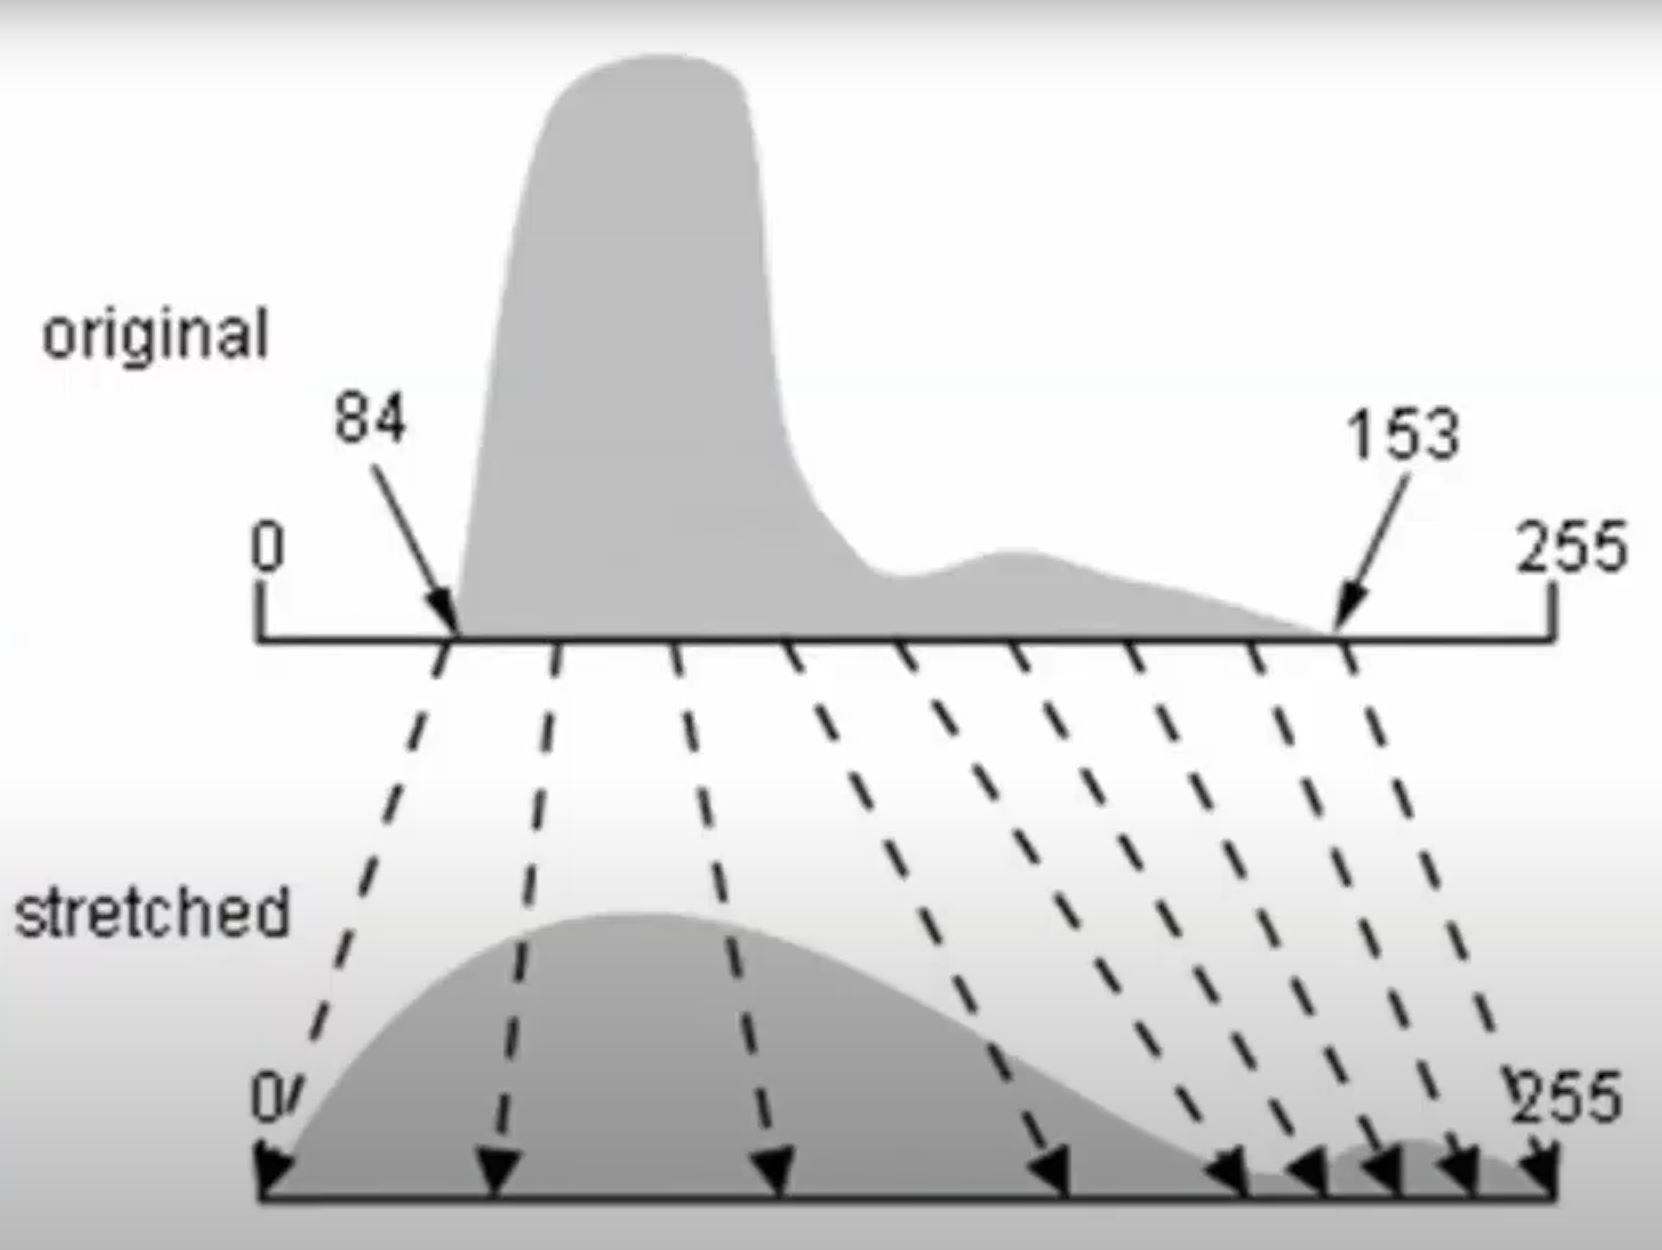

In [4]:
display.Image("./histogram_intensity.JPG")

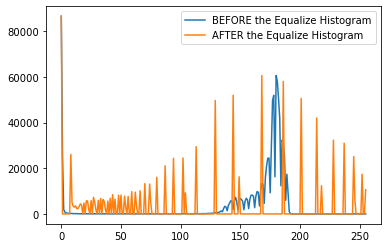

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 


#First of all, we make a function for stretching the image for the gray scale image

def stretching_gray_image(image):
    # here, we read our image and convert to gray scale 
    img = cv2.imread(image,0)

    '''
    After that, we are using Equalize Histogram function from open cv. Basically, in this
    concept it will spread/streacth the value and make image brighter/darker. So the value of image 
    will not concentrate at one particluar area. 
        
    '''
    
    #Here, I put the function of Equalize Histogram function
    equ = cv2.equalizeHist(img)
    
    # Next, we are using hstack for displaying two results which are before and after Equalize Histogram function
    res = np.hstack((img,equ))
    # Displaying the image before and after Equalize Histogram function
    cv2.namedWindow('My first windows',cv2.WINDOW_NORMAL)
    cv2.imshow ('My first windows',res)
    
    #To show the histogram of the image we can use calculation histogram function 
    # In this function, we pass the parameter, channel, 
    hist_before = cv2.calcHist([img],[0], None,[256],[0,256])
    hist_after = cv2.calcHist([equ],[0], None,[256],[0,256])
    plt.plot(hist_before, label = 'BEFORE the Equalize Histogram')
    plt.plot(hist_after, label = 'AFTER the Equalize Histogram ')
    plt.legend()
    
    '''
    There is another way to show the histogram of the image: 
    plt.hist(res.ravel(),256,[0,256])
    plt.show()
    
    '''
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
stretching_gray_image("Phone.jpg")

## Question for saving croping image and saving the coordinate of croping image

###### Here, we make a function  to crop the image, save the crop coordinate also

In [21]:
import cv2
import numpy as np

n_image = 0
crop = False
x_start = 0
y_start = 0
x_end = 0
y_end = 0
image = cv2.imread(r"Joker.jpg",0)
temp_image = image.copy()
# first, I need to make global variable, it is for while looping in later steps
def crop_cv2(event, x, y, flags, param):

    global x_start, y_start, x_end, y_end, crop, n_image
    if event == cv2.EVENT_LBUTTONDOWN:
        # in this part, I begin to get starting coordinate
        x_start, y_start= x, y
        crop = True
    elif event == cv2.EVENT_MOUSEMOVE:
        #here, the last mouse moving it will record as ending coordinates
        if crop == True:
            x_end, y_end = x, y #It is for second cordinate in cv2.rectangle
    elif event == cv2.EVENT_LBUTTONUP:
        
        # when the left mouse button released, it will record the ending x,y coordinates
        x_end, y_end = x, y #It is for second cordinate in cv2.rectangle
        crop = False # cropping is finished
        all_point = [(x_start, y_start), (x_end, y_end)]
        if len(all_point) == 2: 
            # Make sure if list has two values (strating coordinate and ending coordinate), doing slicing
            result = temp_image[all_point[0][1]:all_point[1][1], all_point[0][0]:all_point[1][0]]
            print(result)
            
            cv2.imshow("Imaging_Cropping_Save_Coordinate", result)
            
            # Saving the image in this section  

            cv2.imwrite(f'Joker_crop_{n_image}.jpg',result )
            n_image+=1
    
            
cv2.namedWindow("image")
cv2.setMouseCallback("image", crop_cv2)

res = [] 
n = 0 # I need to make (res and n), if not, it always record coordinate whenever my mouse moving


while True:
    i = image.copy()
    if not crop:
        cv2.imshow("image", image)
        if cv2.waitKey(20) & 0xFF == 27:
            break
    elif crop:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 0, 0), 2)
        cv2.imshow("image", i)

        # Using with statement to make it easy doing file handling 
        with open('crop_coordinate.txt','a+') as f:
            if len(res) == 0:
                first_sentence = f'\nThe coordinate pixel for this crop section: \n'
                f.write(first_sentence)
                res.insert(n, '')     
            else:
                res.insert(n,(x_start, y_start))
                if res[n] != res[n-1]:
                    coordinates = f'First Coordinate rectangle is in: {x_start}, {y_start}, while others {x_end}, {y_end} \n'
                    f.write(coordinates)
                    n+=1
                elif res[n] == res[n-1]:
                    n+=1
                    pass
        
        
    cv2.waitKey(1)
# close all open windows
cv2.destroyAllWindows()

[[151 151 151 ... 165 166 169]
 [150 151 153 ... 166 167 170]
 [149 152 154 ... 167 169 170]
 ...
 [126 126 127 ... 170 167 161]
 [125 125 126 ... 170 167 161]
 [125 126 126 ... 170 167 164]]
[[ 41  48  45 ...  70  52  28]
 [ 42  48  46 ...  83  82  47]
 [ 46  48  48 ...  84  88  65]
 ...
 [ 49  57  65 ... 125 128 131]
 [ 50  57  55 ... 125 128 130]
 [ 54  66  53 ... 127 127 128]]


## Question for image augmentation 

###### Here, we make a function from some image augmentation 

In [17]:
# This is normal image

img = cv2.imread('example.jpg')

cv2.imshow ('My first windows',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import random
img = cv2.imread('example.jpg')

# Here we are doing zoom for the second data augmentation

def picture(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
def zoom(img, value):
    if value > 1 or value < 0:
        raise ValueError("the value should be higher than 0, but less than 1") 
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = picture(img, h, w)
    return img
img = zoom(img, 0.2)
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
import random 
import numpy as np

# Here we are doing vertical flip for the first data augmentation

import cv2
img = cv2.imread('example.jpg')
def vertical_flip(img, vertical):
    if vertical:
        return cv2.flip(img, 0)
    else:
        return img
img = vertical_flip(img, True)
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

# Here, we are doing brightness for the third data augmentation

img = cv2.imread('example.jpg')
def brightness(img, low, high,value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
img = brightness(img, 0.5, 3, 2)
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Here, we are adding the noise for the fourth data augmentation

def adding_noise(img, noise_type):
    if noise_type == "gauss":
        image=img.copy() 
        mean= np.random.randint(0,1)
        st= np.random.uniform(0,10)
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        cv2.imshow('Result', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    elif noise_type == "sp":
        image=img.copy() 
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        cv2.imshow('Result', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

img = cv2.imread('example.jpg')
adding_noise(img,'gauss')


In [13]:
import cv2
import numpy as np

# Here, we are sharpening the image for the fifth data augmentation

img = cv2.imread("Joker.jpg", 0)

def ImageSharpen(SharpenForce):
    kernel = np.array([[0,-1*SharpenForce,0],
                       [-1*SharpenForce,(4*SharpenForce)+1, -1*SharpenForce],
                       [0,-1*SharpenForce,0]])
    return kernel
    
sharpen_kernel = ImageSharpen(20)
sharpenImageWithOne = cv2.filter2D(img, -1,sharpen_kernel)
cv2.namedWindow('My first window')
cv2.imshow('My first window', sharpenImageWithOne)
cv2.waitKey(0)
cv2.destroyAllWindows()
